In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

## LM Notes: Use Seaborn for pretty plotting
import seaborn as sns
style.use('seaborn')
import pprint
from scipy import stats
sns.set(color_codes=True)

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM
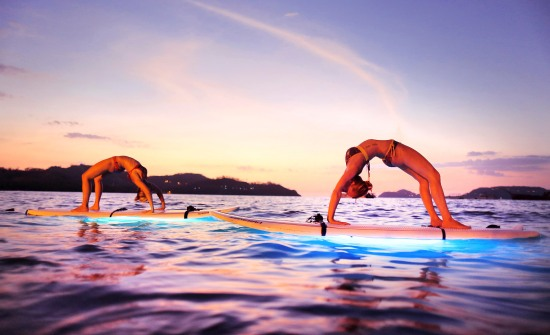

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, Date, desc

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
##LM Notes: Query all records in a database - fetchall returns a list of tuples
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [12]:
##LM Notes: Inspect data 'Measurement'
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
##LM Notes: Inspect data 'Station'
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis
# Precipitation Analysis
 - Design a query to retrieve the last 12 months of precipitation data.
 - Select only the date and prcp values.
 - Load the query results into a Pandas DataFrame and set the index to the date column.
 - Sort the DataFrame values by date.
 - Plot the results using the DataFrame plot method.


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"Last date of record is {date}.")

Last date of record is 2017-08-23.


In [15]:
# Calculate the date 1 year ago from the last data point in the database
one_year_prior = (dt.date(2017,8,23)-dt.timedelta(days=365))
print(f"The first date of record is {one_year_prior}.")

The first date of record is 2016-08-23.


In [16]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_prior).\
    order_by(Measurement.date).all()
#precip_data

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data_df = pd.DataFrame(precip_data)
#precip_data_df 

In [17]:
precip_data_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [18]:
# Sort the dataframe by date
precip_data_df.sort_values(by='date')
precip_data_df.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


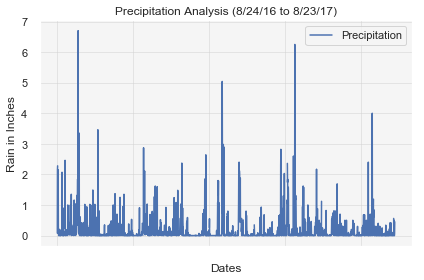

In [37]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot('date', 'prcp')

## Axis and labels 
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.xlabel("Dates")
plt.ylabel("Rain in Inches")

plt.legend(["Precipitation"],frameon=True, facecolor="whitesmoke",loc = 'best')


## Plot design
plt.gca().set_facecolor("whitesmoke")

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(linestyle='-', linewidth='0.5', color='lightgrey')

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


 # LM: Station Statistics
Design a query to calculate the total number of stations.
Design a query to find the most active stations.
 - List the stations and observation counts in descending order.
 - Which station has the highest number of observations?
 - Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

Design a query to retrieve the last 12 months of temperature observation data (tobs).

 - Filter by the station with the highest number of observations.
 - Plot the results as a histogram with bins=12.

In [21]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations available.".format(locations))

There are 9 stations available.


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.prcp).desc()).all()
pprint.pprint(most_active)

[('USC00519281', 2772),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [23]:
##LM Notes: For printing purposes, set most_active station (no. 1) at position [0] to declare and print
most_active_sta = most_active [0][0]
print("The most active Station was",most_active_sta,"with",most_active[0][1],"weather observations.")
print()

The most active Station was USC00519281 with 2772 weather observations.



In [24]:
# Using the station id from the previous query, calculate:
#the lowest temperature recorded, 
#highest temperature recorded, and 
#average temperature most active station?
most_active_sta_info = most_active[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == most_active_sta_info).all()


[(54.0, 71.66378066378067, 85.0)]

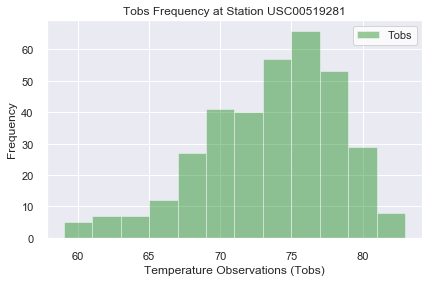

In [35]:
# Choose the station with the highest number of temperature observations (tobs).
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
## Tobs query
tobs_query = session.query(Measurement.tobs). \
    filter(Measurement.date >= one_year_prior). \
    filter(Measurement.station == most_active[0][0]).all()

## Store in a list for manipulation and to use in histogram 
tobs = [temp[0] for temp in tobs_query]

## Axis and labels 
plt.title(f"Tobs Frequency at Station {most_active[0][0]}") #locate station
plt.xlabel("Temperature Observations (Tobs)")
plt.ylabel("Frequency")

## Plot building 
#plt.hist(tobs, bins=12, label="Temperature")
#plt.gca().set_facecolor("whitesmoke") #'get current axis'
#plt.grid(True)
sns.distplot(tobs,bins=12, color = 'green', kde = False);
plt.legend(['Tobs'],frameon=True, facecolor="white", loc = 'best')
plt.show()

# Temperature Analysis (Optional)

- The starter notebook contains a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

- Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

- Plot the min, avg, and max temperature from your previous query as a bar chart.


- Use the average temperature as the bar height.
- Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [152]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [153]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_day_1 = dt.date(2017, 7, 5)
trip_last_day = dt.date(2017, 7, 15)
prior_year = dt.timedelta(days=365)
avg_temp_year = (calc_temps((trip_day_1-prior_year), (trip_last_day-prior_year)))
print(avg_temp_year)

[(71.0, 76.89189189189189, 82.0)]


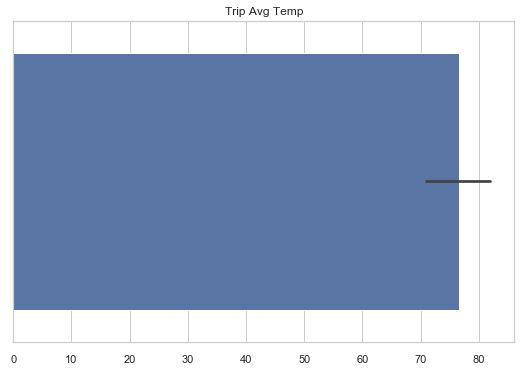

In [167]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
plt.title('Trip Avg Temp')

# Use the average temperature for the y value
sns.set(style="whitegrid")
sns.barplot(avg_temp_year)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
